In [114]:
#Initialization of used libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize
from tqdm.notebook import tqdm
import math


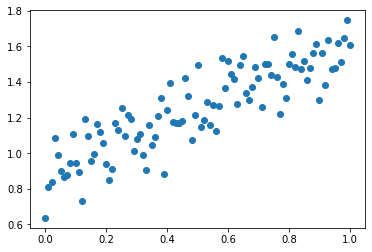

In [115]:
#Initialization of X and Y dots coordinates
alpha = random.uniform (0, 1)
beta = random.uniform (0, 1)

xk = []
for i in range(0, 101):
    xk.append(i/100)
xk = np.array(xk)

yk =[]
for i in xk:
    yk.append(alpha * i + beta + random.normalvariate(0.5, 0.125))
    
plt.scatter(xk,yk)

[0.727944599498256, 0.8887080551576033]


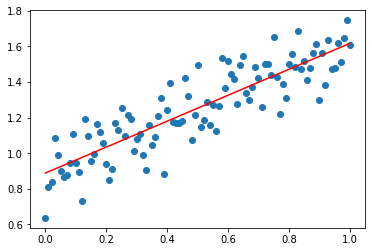

In [116]:
#1.1 Gradient descent for linear function
a = 0.3
b = 0.3
ab_0 = [a, b]
ab_i=[[0.25,0.25]]
ab_i.append(ab_0)
beta_i = []
grad_i = [[0.1, 0.1]]

i=1
while abs(ab_i[i][0] - ab_i[i-1][0]) > 0.001 and abs(ab_i[i][1] - ab_i[i-1][1]) > 0.001:
    grad = [(np.sum(2 * xk * (ab_i[i][0] * xk + ab_i[i][1] - yk)))/len(xk), (np.sum(2 * (ab_i[i][0] * xk + ab_i[i][1] - yk)))/len(xk)]
    grad_i.append(grad)
    beta = abs((np.array(ab_i[i])-np.array(ab_i[i-1]))*(np.array(grad_i[i])-np.array(grad_i[i-1])))/(abs(np.array(grad_i[i])-np.array(grad_i[i-1])))**2
    beta_i.append(beta.tolist())
    x_next = np.array(ab_i[i]) - beta_i[i-1] * np.array(grad_i[i])
    ab_i.append(x_next.tolist())
    i += 1
gd_lin = ab_i[i]
print(gd_lin)
plt.scatter(xk,yk)
plt.plot(xk, gd_lin[0]*xk+gd_lin[1], 'r')

[0.8949942369843328, -0.5014420394296261]


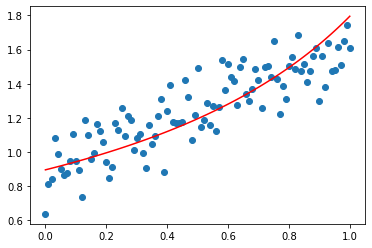

In [117]:
#1.2 Gradient descent for rational function
a = 6
b = -0.3
ab_0 = [a, b]
ab_i=[[1,-0.5]]
ab_i.append(ab_0)
beta_i = []
grad_i = [[0.1, 0.1]]

i=1
while abs(ab_i[i][0] - ab_i[i-1][0]) > 0.001 and abs(ab_i[i][1] - ab_i[i-1][1]) > 0.001:
    grad = [(np.sum((ab_i[i][0]/(1+ab_i[i][1]*xk)-yk)*2/(1+ab_i[i][1]*xk)))/len(xk), (np.sum(2*ab_i[i][0]*xk/(1+ab_i[i][1]*xk)**2*(ab_i[i][0]/(1+ab_i[i][1]*xk)-yk)))/len(xk)]
    grad_i.append(grad)
    beta = abs((np.array(ab_i[i])-np.array(ab_i[i-1]))*(np.array(grad_i[i])-np.array(grad_i[i-1])))/(abs(np.array(grad_i[i])-np.array(grad_i[i-1])))**2
    beta_i.append(beta.tolist())
    x_next = np.array(ab_i[i]) - beta_i[i-1] * np.array(grad_i[i])
    ab_i.append(x_next.tolist())
    i += 1
gd_rat = ab_i[i]
print(gd_rat)
plt.scatter(xk,yk)
plt.plot(xk, gd_rat[0] / (1 + gd_rat[1] * xk), 'r')

Optimization terminated successfully.
         Current function value: 1.442721
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[0.72969411 0.88775174]


C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_17380/4258864691.py:6: OptimizeWarning: Unknown solver options: xtol
  cgd_lin = minimize(fun_lin, [1., 1.], method='CG', options={'xtol': 1e-3, 'disp':True})


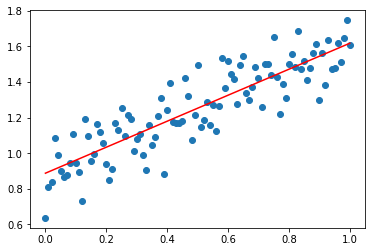

In [118]:
#2.1 Conjugate gradient descent for linear function
def fun_lin(ab):
    a, b = ab
    return np.sum((a * xk + b - yk) ** 2)

cgd_lin = minimize(fun_lin, [1., 1.], method='CG', options={'xtol': 1e-3, 'disp':True})
cgd_lin = cgd_lin.x
plt.plot(xk, cgd_lin[0]*xk + cgd_lin[1], 'r')
plt.scatter(xk,yk)
print(cgd_lin)

Optimization terminated successfully.
         Current function value: 1.611689
         Iterations: 11
         Function evaluations: 69
         Gradient evaluations: 23
[ 0.96275513 -0.42431199]


C:\Users\PROFES~1\AppData\Local\Temp/ipykernel_17380/4039350781.py:6: OptimizeWarning: Unknown solver options: xtol
  cgd_rat = minimize(fun_rat, [1., -0.5], method='CG', options={'xtol': 1e-3, 'disp':True})


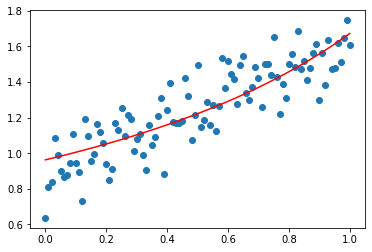

In [119]:
#2.2 Conjugate gradient descent for rational function
def fun_rat(ab):
    a, b = ab
    return np.sum((a / (1 + b * xk) - yk) ** 2)

cgd_rat = minimize(fun_rat, [1., -0.5], method='CG', options={'xtol': 1e-3, 'disp':True})
cgd_rat = cgd_rat.x

plt.plot(xk, cgd_rat[0] / (1 + cgd_rat[1] * xk), 'r')
plt.scatter(xk,yk)
print(cgd_rat)

Optimization terminated successfully.
         Current function value: 1.443234
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26
         Hessian evaluations: 24
[0.73736754 0.88418629]


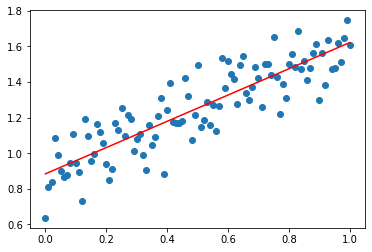

In [120]:
#3.1 Newton’s method for linear function
def fun_lin(ab):
    a, b = ab
    return np.sum((a * xk + b - yk) ** 2)

def der_lin(ab):
    a, b = ab
    return np.array([np.sum(2 * xk * (b + a * xk - yk)), np.sum(2 * (b + a * xk - yk))])

def hess_lin(ab):
    a, b = ab
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * xk**2)
    hess[0,1] = np.sum(2 * xk)
    hess[1,0] = np.sum(2 * xk)
    hess[1,1] = (2)
    return hess

newton_lin = minimize(fun_lin, [1., 1.], method='Newton-CG', jac=der_lin, hess=hess_lin, options={'xtol': 1e-3, 'disp':True})
nt_lin = newton_lin.x
plt.plot(xk, nt_lin[0]*xk + nt_lin[1], 'r')
plt.scatter(xk,yk)
print(nt_lin)

         Current function value: 2.274527
         Iterations: 2
         Function evaluations: 24
         Gradient evaluations: 12
         Hessian evaluations: 3
[ 0.86306386 -0.53467677]


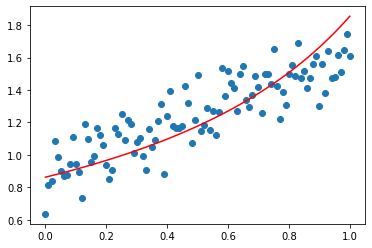

In [121]:
#3.2 Newton’s method for rational function
def fun_rat(ab):
    a, b = ab
    return np.sum((a / (1 + b * xk) - yk) ** 2)

def der_rat(ab):
    a, b = ab
    return np.array([np.sum((a/(1+b*xk) - yk)*2/(1+b*xk)), np.sum(2*a*xk/(1+b*xk)**2 * (a/(1+b*xk)-yk))])

def hess_rat(ab):
    a, b = ab
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = np.sum(-2*a*xk/(1+b*xk)**3-2*xk*(a/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,0] = np.sum(-2*a*xk/(1+b*xk)**3-2*xk*(a/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,1] = np.sum(2 * a**2 * xk**2 / (1+b*xk)**4 * 4 * a * xk**2 * (a/(1+b*xk)-yk) / (1+b*xk)**3)
    return hess

newton_rat = minimize(fun_rat, [1.1, -0.5], method='Newton-CG', jac=der_rat, hess=hess_rat, options={'xtol': 1e-3, 'disp':True})
nt_rat = newton_rat.x

plt.plot(xk, nt_rat[0] / (1 + nt_rat[1] * xk), 'r')
plt.scatter(xk,yk)
print(nt_rat)

[0.73818075 0.88005023]


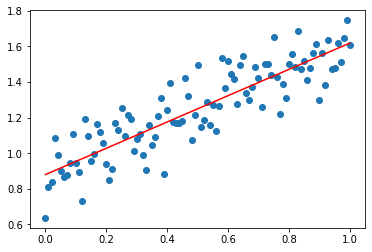

In [122]:
#4.1 Levenberg-Marquardt algorithm for linear function
def fun_lin_lma(ab):
    a, b = ab
    return(((a * xk + b) - yk)**2)

lma_lin = optimize.least_squares(fun_lin_lma, [1., 1.], method="lm", xtol=1e-3)
lma_lin = lma_lin.x

plt.plot(xk, lma_lin[0]*xk + lma_lin[1], 'r')
plt.scatter(xk,yk)
print(lma_lin)

[ 0.95270919 -0.43515056]


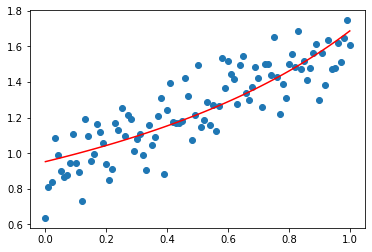

In [123]:
#4.2 Levenberg-Marquardt algorithm for rational function
def fun_rat_lma(ab):
    a, b = ab
    return(((a/(1+b*xk)) - yk)**2)

lma_rat = optimize.least_squares(fun_rat_lma, [1., -0.5], method="lm", xtol=1e-3)
lma_rat = lma_rat.x

plt.plot(xk, lma_rat[0]/(1+lma_rat[1]*xk), 'r')
plt.scatter(xk,yk)
print(lma_rat)

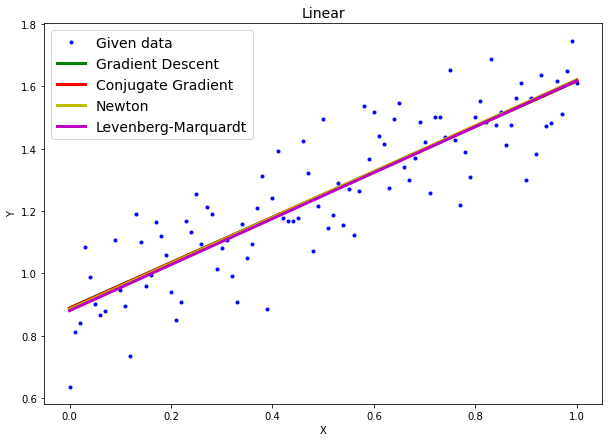

In [124]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, gd_lin[0]*xk + gd_lin[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, cgd_lin[0]*xk + cgd_lin[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, nt_lin[0]*xk + nt_lin[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_lin[0]*xk + lma_lin[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

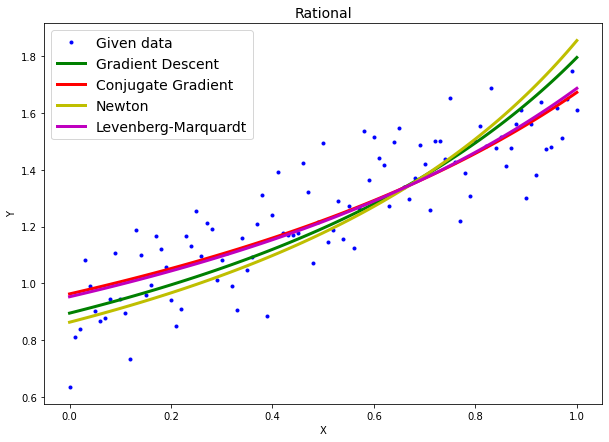

In [125]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, gd_rat[0] / (1 + gd_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, cgd_rat[0] /(1 + cgd_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, nt_rat[0] / (1 + nt_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)